![for sale image, from https://time.com/5835778/selling-home-coronavirus/](https://api.time.com/wp-content/uploads/2020/05/selling-home-coronavirus.jpg?w=800&quality=85)

# Project Title

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

A real estate agency wants us to model the sales price of homes in King County, Washington. They will use our model to help home buyers decide whether homes are underpriced or overpriced. The price of a home can be affected by multiple predictors. We will look at which predictors are statistically significant in terms of affecting a home price. Having a real estate agency use our model will build trust between them and the home buyer. This will likely result in the homebuyer using the same real estate agency if they sell their house in the future.


## Data Understanding

## REVISE LATER THIS WEEK

This data came from Kings County, Washington. It gives us the House Sales for homes in King County, Washington. This will help us model what predicts a sales price for a home buyer. Each data entry represents a house. Our target variable is the price of the home. 

Describe the data being used for this project.

Questions to consider:

- Where did the data come from, and how do they relate to the data analysis questions?
- What do the data represent? Who is in the sample and what variables are included?
- What is the target variable?
- What are the properties of the variables you intend to use?

In [1]:
 # Basic imports
import numpy as np
import pandas as pd
# Data visualizations
import matplotlib.pyplot as plt
import seaborn as sns
# Pre-Processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
# StatsModel and Metrics
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#### Define Utility Function

In [2]:
# # utils.py
# import matplotlib.pyplot as plt
# from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def evaluate(y_train, train_preds, y_test, test_preds):
    '''
    Evaluate the amount of error between my model's predictionms and the actual values
    for both a train and a test set
    
    Inputs: 
        y_train - array like, actual values for 'price for my train dataset
        train_preds - array like, predicted values for 'price' for my train dataset
        y_test
        test_preds
    
    Outputs:
        None
    '''
    print(f"Train R2: {r2_score(y_train, train_preds):.4f}")
    print(f"Test R2: {r2_score(y_test, test_preds):.4f}")
    print("*****")
    print(f"Train RMSE: ${mean_squared_error(y_train, train_preds, squared=False):,.2f}")
    print(f"Train RMSE: ${mean_squared_error(y_test, test_preds, squared=False):,.2f}")
    print("*****")
    print(f"Train MAE: ${mean_absolute_error(y_train, train_preds):,.2f}")
    print(f"Train MAE: ${mean_absolute_error(y_test, test_preds):,.2f}")
    print("*****")
    
    # Calculate our residuals 
    train_residuals = y_train - train_preds
    test_residuals = y_test - test_preds
    
    # Scatter plot 
    plt.scatter(train_preds, train_residuals, label = 'Train')
    plt.scatter(test_preds, test_residuals, label = 'Test')
    
    plt.axhline(y=0, color = 'red', label = '0')
    plt.xlabel('predictions')
    plt.ylabel('residuals')
    plt.legend()
    
    sm.qqplot(train_residuals, line = 'r', label = 'train residuals');
    plt.legend()
    
    sm.qqplot(test_residuals, line = 'r', label = 'test residuals');
    plt.legend()
    plt.show()
    
    

#### Read in Data

In [3]:
!ls data

column_names.md   kc_house_data.csv


In [4]:
# Load Housing Data Set
df = pd.read_csv('data/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [5]:
#Information on dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [6]:
#Describe the dataframe with descriptive statistics
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
df['id'].value_counts()

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420, dtype: int64

In [8]:
df['date'].value_counts()

6/23/2014     142
6/26/2014     131
6/25/2014     131
7/8/2014      127
4/27/2015     126
             ... 
3/8/2015        1
8/30/2014       1
1/31/2015       1
1/17/2015       1
11/30/2014      1
Name: date, Length: 372, dtype: int64

In [9]:
df['price'].value_counts()

350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64

In [10]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [11]:
df['bathrooms'].value_counts()

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [12]:
#square footage of house living space
df['sqft_living'].value_counts()

1300    138
1400    135
1440    133
1660    129
1010    129
       ... 
4970      1
2905      1
2793      1
4810      1
1975      1
Name: sqft_living, Length: 1034, dtype: int64

In [13]:
#square footage of house lot
df['sqft_lot'].value_counts()

5000      358
6000      290
4000      251
7200      220
7500      119
         ... 
1448        1
38884       1
17313       1
35752       1
315374      1
Name: sqft_lot, Length: 9776, dtype: int64

In [14]:
df['floors'].value_counts()

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

In [15]:
#does this house have a waterfront?
df['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [16]:
#how well is the view from the house
df['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [17]:
df['condition'].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [18]:
#house grades from poor to mansion
df['grade'].value_counts().sort_index(ascending = False)

9 Better         2615
8 Good           6065
7 Average        8974
6 Low Average    2038
5 Fair            242
4 Low              27
3 Poor              1
13 Mansion         13
12 Luxury          89
11 Excellent      399
10 Very Good     1134
Name: grade, dtype: int64

In [19]:
df['sqft_above'].value_counts()

1300    212
1010    210
1200    206
1220    192
1140    184
       ... 
2601      1
440       1
2473      1
2441      1
1975      1
Name: sqft_above, Length: 942, dtype: int64

In [20]:
df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
3260.0        1
1920.0        1
4820.0        1
875.0         1
2240.0        1
Name: sqft_basement, Length: 304, dtype: int64

In [21]:
df['yr_built'].value_counts()

2014    559
2006    453
2005    450
2004    433
2003    420
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

In [22]:
#year house was renovated, if it was at all
df['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [23]:
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [24]:
#latitude of house
df['lat'].value_counts()

47.6846    17
47.5322    17
47.6624    17
47.5491    17
47.6886    16
           ..
47.3104     1
47.4681     1
47.2819     1
47.6096     1
47.4300     1
Name: lat, Length: 5033, dtype: int64

In [25]:
#longitude of house
df['long'].value_counts()

-122.290    115
-122.300    111
-122.362    104
-122.291    100
-122.372     99
           ... 
-121.803      1
-121.711      1
-122.454      1
-121.835      1
-121.849      1
Name: long, Length: 751, dtype: int64

In [26]:
#square footage of living space for the 15 closest neighbors
df['sqft_living15'].value_counts()

1540    197
1440    195
1560    192
1500    180
1460    169
       ... 
4890      1
2873      1
952       1
3193      1
2049      1
Name: sqft_living15, Length: 777, dtype: int64

In [27]:
#square footage of lot space for the 15 closest neighbors
df['sqft_lot15'].value_counts()

5000      427
4000      356
6000      288
7200      210
4800      145
         ... 
11036       1
8989        1
871200      1
809         1
6147        1
Name: sqft_lot15, Length: 8682, dtype: int64

## Data Preparation

Describe and justify the process for preparing the data for analysis.

Questions to consider:

- Were there variables you dropped or created?
- How did you address missing values or outliers?
- Why are these choices appropriate given the data and the business problem?

In [28]:
df[df['bedrooms']==33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,NO,NONE,...,7 Average,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


In [29]:
#Replace 33 bedrooms with 3 bedrooms, since 3 is the mean for bedroom count in this dataset
#We suspect this was a typing error when entering the home data
df['bedrooms'].replace(33, 3, inplace=True)

In [30]:
df[df['sqft_basement']=='?']

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,NO,NONE,...,7 Average,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
18,16000397,12/5/2014,189000.0,2,1.00,1200,9850,1.0,NO,NONE,...,7 Average,1200,?,1921,0.0,98002,47.3089,-122.210,1060,5095
42,7203220400,7/7/2014,861990.0,5,2.75,3595,5639,2.0,NO,NONE,...,9 Better,3595,?,2014,0.0,98053,47.6848,-122.016,3625,5639
79,1531000030,3/23/2015,720000.0,4,2.50,3450,39683,2.0,NO,NONE,...,10 Very Good,3450,?,2002,0.0,98010,47.3420,-122.025,3350,39750
112,2525310310,9/16/2014,272500.0,3,1.75,1540,12600,1.0,NO,NONE,...,7 Average,1160,?,1980,0.0,98038,47.3624,-122.031,1540,11656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21442,3226049565,7/11/2014,504600.0,5,3.00,2360,5000,1.0,NO,NONE,...,7 Average,1390,?,2008,0.0,98103,47.6931,-122.330,2180,5009
21447,1760650900,7/21/2014,337500.0,4,2.50,2330,4907,2.0,NO,NONE,...,7 Average,2330,?,2013,NaN,98042,47.3590,-122.081,2300,3836
21473,6021503707,1/20/2015,352500.0,2,2.50,980,1010,3.0,NaN,NONE,...,8 Good,980,?,2008,0.0,98117,47.6844,-122.387,980,1023
21519,2909310100,10/15/2014,332000.0,4,2.50,2380,5737,2.0,NO,NONE,...,7 Average,2380,?,2010,0.0,98023,47.2815,-122.356,2380,5396


In [31]:
#Change ? entries for sqft_basement
#This is done by subtracting the sqft_above from sqft_living
df['sqft_basement_diff']= df['sqft_living'] - df['sqft_above']

In [32]:
df[['sqft_basement','sqft_basement_diff']]

,sqft_basement,sqft_basement_diff
0,0.0,0
1,400.0,400
2,0.0,0
3,910.0,910
4,0.0,0
...,...,...
21592,0.0,0
21593,0.0,0
21594,0.0,0
21595,0.0,0


#### Check null values in the dataframe

In [33]:
df.isna().sum()

id                       0
date                     0
price                    0
bedrooms                 0
bathrooms                0
sqft_living              0
sqft_lot                 0
floors                   0
waterfront            2376
view                    63
condition                0
grade                    0
sqft_above               0
sqft_basement            0
yr_built                 0
yr_renovated          3842
zipcode                  0
lat                      0
long                     0
sqft_living15            0
sqft_lot15               0
sqft_basement_diff       0
dtype: int64

In [34]:
#Change the entries in waterfront from YES/NO to 1/0
df['waterfront'].replace("YES", 1, inplace=True)
df['waterfront'].replace("NO", 0, inplace=True)
df['waterfront'].fillna(value=0,inplace=True)

In [35]:
#Change the null entries for yr_renovated to 0
df['yr_renovated'].fillna(value=0,inplace=True)

In [36]:
#Change the null values for view to NONE
df['view'].fillna(value='NONE',inplace=True)

In [37]:
df.isna().sum()

id                    0
date                  0
price                 0
bedrooms              0
bathrooms             0
sqft_living           0
sqft_lot              0
floors                0
waterfront            0
view                  0
condition             0
grade                 0
sqft_above            0
sqft_basement         0
yr_built              0
yr_renovated          0
zipcode               0
lat                   0
long                  0
sqft_living15         0
sqft_lot15            0
sqft_basement_diff    0
dtype: int64

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  21597 non-null  int64  
 1   date                21597 non-null  object 
 2   price               21597 non-null  float64
 3   bedrooms            21597 non-null  int64  
 4   bathrooms           21597 non-null  float64
 5   sqft_living         21597 non-null  int64  
 6   sqft_lot            21597 non-null  int64  
 7   floors              21597 non-null  float64
 8   waterfront          21597 non-null  float64
 9   view                21597 non-null  object 
 10  condition           21597 non-null  object 
 11  grade               21597 non-null  object 
 12  sqft_above          21597 non-null  int64  
 13  sqft_basement       21597 non-null  object 
 14  yr_built            21597 non-null  int64  
 15  yr_renovated        21597 non-null  float64
 16  zipc

In [39]:
df.select_dtypes(include = "object")

,date,view,condition,grade,sqft_basement
0,10/13/2014,NONE,Average,7 Average,0.0
1,12/9/2014,NONE,Average,7 Average,400.0
2,2/25/2015,NONE,Average,6 Low Average,0.0
3,12/9/2014,NONE,Very Good,7 Average,910.0
4,2/18/2015,NONE,Average,8 Good,0.0
...,...,...,...,...,...
21592,5/21/2014,NONE,Average,8 Good,0.0
21593,2/23/2015,NONE,Average,8 Good,0.0
21594,6/23/2014,NONE,Average,7 Average,0.0
21595,1/16/2015,NONE,Average,8 Good,0.0


In [40]:
obj_column = [c for c in df.columns if df[c].dtype == 'object']
df[obj_column].describe()

,date,view,condition,grade,sqft_basement
count,21597,21597,21597,21597,21597
unique,372,5,5,11,304
top,6/23/2014,NONE,Average,7 Average,0.0
freq,142,19485,14020,8974,12826


In [41]:
# Create a variable for view column
view_col = df[["view"]]
condition_df = df[["condition"]]
grade_df = df[['grade']]

# Instantiate a OneHotEncoder with categories="auto",
# sparse=False, and handle_unknown="ignore"
ohe_view = OneHotEncoder(categories="auto",sparse=False, handle_unknown="ignore")
ohe_cond = OneHotEncoder(categories="auto", sparse=False, handle_unknown="ignore")
ohe_grade = OneHotEncoder(categories = 'auto', sparse=False, handle_unknown ='ignore')

# Fit the encoder on view_col
ohe_view.fit(view_col)
ohe_cond.fit(condition_df)
ohe_grade.fit(grade_df)

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [42]:
# Transform view_col using the encoder and
# assign the result to view_col_encoded
view_col_encoded = ohe_view.transform(view_col)
condition_df_encoded = ohe_cond.transform(condition_df)
grade_encoded = ohe_grade.transform(grade_df)

In [43]:
# Make the transformed data into a dataframe
view_col_encoded = pd.DataFrame(
    # Pass in NumPy array
    view_col_encoded,
    # Set the column names to the categories found by OHE
    columns="view_"+ohe_view.categories_[0],
    # Set the index to match df's index
    index=df.index
)
condition_df_encoded = pd.DataFrame(
    # Pass in NumPy array
    condition_df_encoded,
    # Set the column names to the categories found by OHE
    columns="cond_"+ohe_cond.categories_[0],
    # Set the index to match df's index
    index=df.index
)
grade_encoded = pd.DataFrame(
    # Pass in NumPy array
    grade_encoded,
    # Set the column names to the categories found by OHE
    columns="grade_"+ohe_grade.categories_[0],
    # Set the index to match df's index
    index=df.index
)

In [44]:
# Drop original view column
df.drop("view", axis=1, inplace=True)
df.drop("condition", axis=1, inplace=True)
df.drop("grade", axis=1, inplace=True)

# Concatenate the new dataframe with current df
df = pd.concat([df, view_col_encoded, condition_df_encoded, grade_encoded], axis=1)

# Visually inspect df
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,...,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,1180,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,2170,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,770,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,1050,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,1680,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   21597 non-null  int64  
 1   date                 21597 non-null  object 
 2   price                21597 non-null  float64
 3   bedrooms             21597 non-null  int64  
 4   bathrooms            21597 non-null  float64
 5   sqft_living          21597 non-null  int64  
 6   sqft_lot             21597 non-null  int64  
 7   floors               21597 non-null  float64
 8   waterfront           21597 non-null  float64
 9   sqft_above           21597 non-null  int64  
 10  sqft_basement        21597 non-null  object 
 11  yr_built             21597 non-null  int64  
 12  yr_renovated         21597 non-null  float64
 13  zipcode              21597 non-null  int64  
 14  lat                  21597 non-null  float64
 15  long                 21597 non-null 

## Modeling

Describe and justify the process for analyzing or modeling the data.

Questions to consider:

- How did you analyze the data to arrive at an initial approach?
- How did you iterate on your initial approach to make it better?
- Why are these choices appropriate given the data and the business problem?

In [46]:
X = df.drop(columns=['id', 'price'])
y = df['price']

In [47]:
# Train - Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [48]:
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

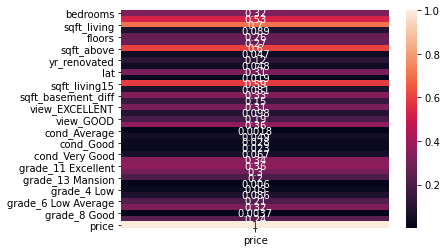

In [49]:
# Absolute value correlations with price
sns.heatmap(abs(train_df.corr())[['price']], annot=True);

In [50]:
np.abs(train_df.corr()['price']).sort_values(ascending = False)

price                  1.000000
sqft_living            0.700397
sqft_above             0.601355
sqft_living15          0.591150
bathrooms              0.529906
view_NONE              0.363970
grade_11 Excellent     0.359538
grade_10 Very Good     0.343478
sqft_basement_diff     0.328176
bedrooms               0.320253
grade_7 Average        0.317165
lat                    0.306659
view_EXCELLENT         0.306340
grade_12 Luxury        0.298478
waterfront             0.267665
floors                 0.257826
grade_9 Better         0.238251
grade_6 Low Average    0.210427
grade_13 Mansion       0.202751
view_GOOD              0.188906
view_AVERAGE           0.146068
yr_renovated           0.116552
view_FAIR              0.097989
sqft_lot               0.089019
grade_5 Fair           0.086128
sqft_lot15             0.080682
cond_Very Good         0.067110
cond_Fair              0.049162
zipcode                0.047865
yr_built               0.046835
grade_4 Low            0.030208
cond_Goo

## Evaluation

The evaluation of each model should accompany the creation of each model, and you should be sure to evaluate your models consistently.

Evaluate how well your work solves the stated business problem. 

Questions to consider:

- How do you interpret the results?
- How well does your model fit your data? How much better is this than your baseline model? Is it over or under fit?
- How well does your model/data fit any modeling assumptions?

For the final model, you might also consider:

- How confident are you that your results would generalize beyond the data you have?
- How confident are you that this model would benefit the business if put into use?

### Baseline Understanding

- What does a baseline, model-less prediction look like?

In [51]:
# code here to arrive at a baseline prediction
train_target_mean = y_train.mean()
train_target_mean

541284.4615669568

Train R2: 0.0000
Test R2: -0.0001
*****
Train RMSE: $366,333.44
Train RMSE: $370,425.86
*****
Train MAE: $234,722.63
Train MAE: $233,000.84
*****


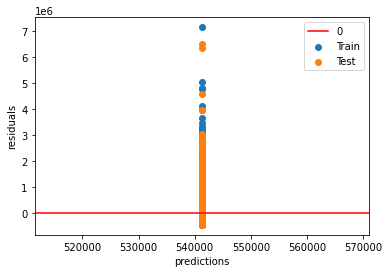

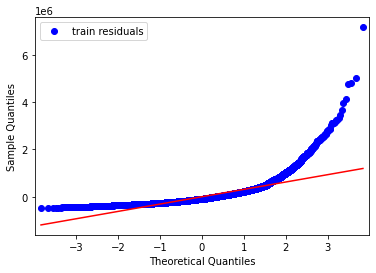

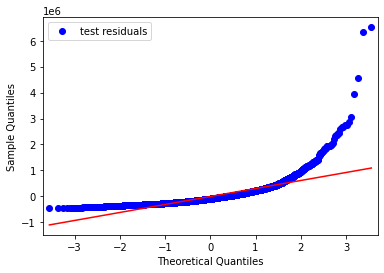

In [52]:
baseline_train_preds = [train_target_mean]*len(y_train)
baseline_test_preds = [train_target_mean]*len(y_test)
evaluate(y_train, baseline_train_preds, y_test, baseline_test_preds)

### First Simple Model

Before going too far down the data preparation rabbit hole, be sure to check your work against a first 'substandard' model! What is the easiest way for you to find out how hard your problem is?

In [53]:
# code here for your first 'substandard' model
fsm_X_train= X_train['sqft_living']
fsm_X_test = X_test['sqft_living']
fsm = sm.OLS(y_train, sm.add_constant(fsm_X_train)).fit()
fsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                 1.559e+04
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        12:14:13   Log-Likelihood:            -2.2503e+05
No. Observations:               16197   AIC:                         4.501e+05
Df Residuals:                   16195   BIC:                         4.501e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.099e+04   5095.343     -8.044      0.000    -5.1e+04    -3.1e+04
sqft_living   279.4423      2.238    124.878      0.000     275.056     283.828
==============================================================================
Omnibus:                    10430.239   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           291279.150
Skew:                           2.656   Prob(JB):                         0.00
Kurtosis:                      23.084   Cond. No.                     5.65e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Train R2: 0.4906
Test R2: 0.4989
*****
Train RMSE: $261,471.87
Train RMSE: $262,216.52
*****
Train MAE: $174,170.69
Train MAE: $171,964.83
*****


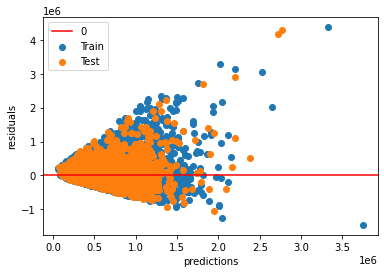

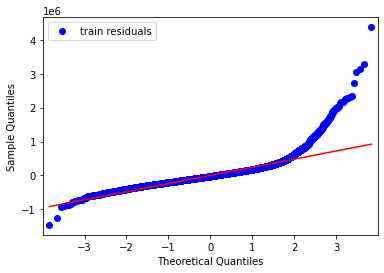

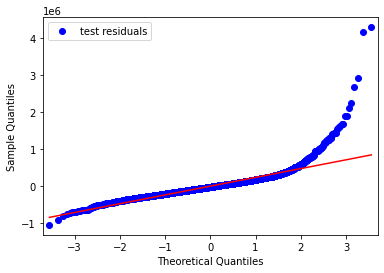

In [54]:
# code here to evaluate your first 'substandard' model
fsm_train_preds = fsm.predict(sm.add_constant(fsm_X_train))
fsm_test_preds = fsm.predict(sm.add_constant(fsm_X_test))

evaluate(y_train, fsm_train_preds, y_test, fsm_test_preds)

In [55]:
logged_fsm_y_train= np.log(y_train)
logged_fsm_y_test = np.log(y_test)
fsm_logged = sm.OLS(logged_fsm_y_train, sm.add_constant(fsm_X_train)).fit()
fsm_logged.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                 1.514e+04
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        12:14:14   Log-Likelihood:                -7274.1
No. Observations:               16197   AIC:                         1.455e+04
Df Residuals:                   16195   BIC:                         1.457e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.2179      0.007   1653.638      0.000      12.203      12.232
sqft_living     0.0004   3.24e-06    123.040      0.000       0.000       0.000
==============================================================================
Omnibus:                        2.151   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.341   Jarque-Bera (JB):                2.122
Skew:                           0.025   Prob(JB):                        0.346
Kurtosis:                       3.026   Cond. No.                     5.65e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Train R2: 0.4831
Test R2: 0.4836
*****
Train RMSE: $0.38
Train RMSE: $0.38
*****
Train MAE: $0.31
Train MAE: $0.31
*****


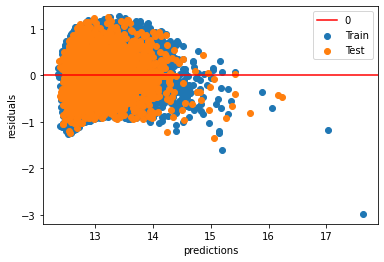

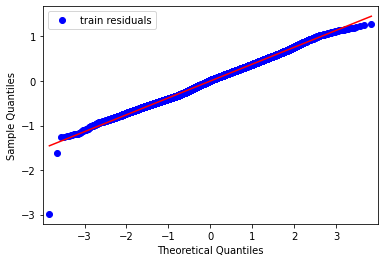

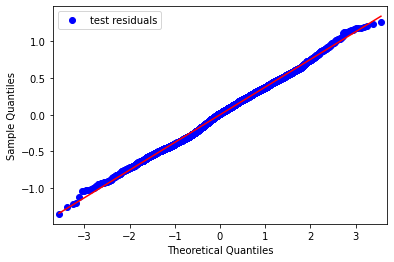

In [61]:
logged_fsm_train_preds = fsm_logged.predict(sm.add_constant(fsm_X_train))
logged_fsm_test_preds = fsm_logged.predict(sm.add_constant(fsm_X_test))

evaluate(logged_fsm_y_train, logged_fsm_train_preds, logged_fsm_y_test, logged_fsm_test_preds)

### Modeling Iterations

Now you can start to use the results of your first model to iterate - there are many options!

In [57]:
# code here to iteratively improve your models

In [58]:
# code here to evaluate your iterations

### 'Final' Model

In the end, you'll arrive at a 'final' model - aka the one you'll use to make your recommendations/conclusions. This likely blends any group work. It might not be the one with the highest scores, but instead might be considered 'final' or 'best' for other reasons.

In [59]:
# code here to show your final model

In [60]:
# code here to evaluate your final model

## Conclusions

Provide your conclusions about the work you've done, including any limitations or next steps.

Questions to consider:

- What would you recommend the business do as a result of this work?
- What are some reasons why your analysis might not fully solve the business problem?
- What else could you do in the future to improve this project (future work)?
